# Image Classification - The Multi-class Weather Dataset

**Submission deadline: Friday 5 April, 11:55pm**

**Assessment weight: 15% of the total unit assessment.**

**Versions**

- Wednesday 13 March: Initial release

*Unless a Special Consideration request has been submitted and approved, a 5% penalty (of the total possible mark of the task) will be applied for each day a written report or presentation assessment is not submitted, up until the 7th day (including weekends). After the 7th day, a grade of ‘0’ will be awarded even if the assessment is submitted. The submission time for all uploaded assessments is **11:55 pm**. A 1-hour grace period will be provided to students who experience a technical concern. For any late submission of time-sensitive tasks, such as scheduled tests/exams, performance assessments/presentations, and/or scheduled practical assessments/labs, please apply for [Special Consideration](https://students.mq.edu.au/study/assessment-exams/special-consideration).*

In this assignment you will complete tasks for an end-to-end image classification application. We will train and test the data using the Multi-class Weather Dataset (MWD):

- https://data.mendeley.com/datasets/4drtyfjtfy/1

The MWD contains labelled images representing various weather scenarios. It is a small and popular dataset for practice with image classification.

# Connect to GitHub Classroom

Please follow these steps to connect:

1. Follow this invitation link and accept the invitation: https://classroom.github.com/a/TGh1XJFW
2. The link may ask you to sign in to GitHub (if you haven't signed in earlier). If you don't have a GitHub account, you will need to register.
3. Once you have logged in with GitHub, you may need to select your email address to associate your GitHub account with your email address (if you haven't done it in a previous COMP3420 activity). If you can't find your email address, please skip this step and contact diego.molla-aliod@mq.edu.au so that he can do the association manually.
4. Wait a minute or two, and refresh the browser until it indicates that your assignment repository has been created. Your repository is private to you, and you have administration privileges. Only you and the lecture will have access to it. The repository will be listed under the list of repositories belonging to this offering of COMP3420: https://github.com/orgs/COMP3420-2024S1/repositories
5. In contrast with assignment 1 and the practical sessions, your assignment repository will be empty and will not include starter code. you need to add this Jupyter notebook and commit the changes.

Please use the github repository linked to this GitHub classroom. Make sure that you continuously push commits and you provide useful commit comments. Note the following:

*  **1 mark of the assessment of this assignment is related to good practice with the use of GitHub.**
*  **We will also use github as a tool to check for possible plagiarism or contract cheating. For example, if someone only makes commits on the last day, we may investigate whether there was plagiarism or contract cheating.**


# Tasks
## Task 1 - Data exploration, preparation, and partition (4 marks)

Download the MWD from this site and unzip it:

- https://data.mendeley.com/datasets/4drtyfjtfy/1

You will observe that the zipped file contains 1,125 images representing various weather conditions. To facilitate the assessment of this assignment, please make sure that the images are in a folder named `dataset2` and this folder is in the same place as this jupyter notebook.

### 1.1 - data partition (2 marks)

Generate three CSV files named `my_training.csv`, `my_validation.csv`, and `my_test.csv` that partition the dataset into the training, validation, and test set. Each CSV file contains the following two fields:

- File path
- Image label

For example, the file `my_training.csv` could start like this:

```csv
dataset2/cloudy1.jpg,cloudy
dataset2/shine170.jpg,shine
dataset2/shine116.jpg,shine
```

Make sure that the partitions are created randomly, so that the label distribution is similar in each partition. Also, make sure that the samples are sorted in no particular order (randomly)

Display the label distribution of each partition, and display the first 10 rows of each partition.

The following sample files are available together with these instructions. Your files should look similar to these.

- `training.csv`
- `validation.csv`
- `test.csv`

**For the subsequent tasks in this assignment, use the files we provide (`training.csv`, `validation.csv`, `test.csv`). Do not use the files that you have generated, so that any errors generated by your solution do not carry to the rest of the assignment. Also, the files we provide conveniently removed references to images that have a number of channels different from 3.**




In [2]:
import numpy as np
import os
from matplotlib import pyplot as plt
import pandas as pd
import glob

In [3]:
import random
image_folder = 'dataset2'

# Get a list of all image file names in the folder
file_path = [(image_folder + "/" + file) for file in os.listdir(image_folder)]

# Shuffle the list of file names randomly
random.shuffle(file_path)

file_path

['dataset2/rain75.jpg',
 'dataset2/cloudy12.jpg',
 'dataset2/sunrise105.jpg',
 'dataset2/sunrise146.jpg',
 'dataset2/cloudy179.jpg',
 'dataset2/shine212.jpg',
 'dataset2/cloudy205.jpg',
 'dataset2/cloudy118.jpg',
 'dataset2/cloudy247.jpg',
 'dataset2/sunrise43.jpg',
 'dataset2/sunrise245.jpg',
 'dataset2/rain107.jpg',
 'dataset2/sunrise61.jpg',
 'dataset2/shine7.jpg',
 'dataset2/sunrise71.jpg',
 'dataset2/shine49.jpg',
 'dataset2/cloudy229.jpg',
 'dataset2/sunrise325.jpg',
 'dataset2/sunrise231.jpg',
 'dataset2/rain117.jpg',
 'dataset2/sunrise338.jpg',
 'dataset2/cloudy111.jpg',
 'dataset2/cloudy216.jpg',
 'dataset2/rain110.jpg',
 'dataset2/rain18.jpg',
 'dataset2/rain10.jpg',
 'dataset2/cloudy200.jpg',
 'dataset2/shine230.jpg',
 'dataset2/rain99.jpg',
 'dataset2/rain94.jpg',
 'dataset2/sunrise90.jpg',
 'dataset2/cloudy152.jpg',
 'dataset2/shine203.jpg',
 'dataset2/sunrise50.jpg',
 'dataset2/sunrise167.jpg',
 'dataset2/cloudy54.jpg',
 'dataset2/shine94.jpg',
 'dataset2/sunrise114.jpg',

In [43]:
#extracting the image label and checking the extraction is right.
import re
labels=[]
for i in file_path:
    image_label = re.match(r'^([a-zA-Z]+)', i.split("/")[-1]).group()
    labels.append(image_label)
    print(i,",",image_label)

dataset2/rain75.jpg , rain
dataset2/cloudy12.jpg , cloudy
dataset2/sunrise105.jpg , sunrise
dataset2/sunrise146.jpg , sunrise
dataset2/cloudy179.jpg , cloudy
dataset2/shine212.jpg , shine
dataset2/cloudy205.jpg , cloudy
dataset2/cloudy118.jpg , cloudy
dataset2/cloudy247.jpg , cloudy
dataset2/sunrise43.jpg , sunrise
dataset2/sunrise245.jpg , sunrise
dataset2/rain107.jpg , rain
dataset2/sunrise61.jpg , sunrise
dataset2/shine7.jpg , shine
dataset2/sunrise71.jpg , sunrise
dataset2/shine49.jpg , shine
dataset2/cloudy229.jpg , cloudy
dataset2/sunrise325.jpg , sunrise
dataset2/sunrise231.jpg , sunrise
dataset2/rain117.jpg , rain
dataset2/sunrise338.jpg , sunrise
dataset2/cloudy111.jpg , cloudy
dataset2/cloudy216.jpg , cloudy
dataset2/rain110.jpg , rain
dataset2/rain18.jpg , rain
dataset2/rain10.jpg , rain
dataset2/cloudy200.jpg , cloudy
dataset2/shine230.jpg , shine
dataset2/rain99.jpg , rain
dataset2/rain94.jpg , rain
dataset2/sunrise90.jpg , sunrise
dataset2/cloudy152.jpg , cloudy
dataset2/

AttributeError: 'NoneType' object has no attribute 'group'

In [5]:
#finding the unique image labels in data
set(labels)

{'cloudy', 'rain', 'shine', 'sunrise'}

In [33]:
# Function to write data to CSV file
def write_to_csv(data, filename):
    with open(filename, 'w', newline='') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(['File path', 'Image label'])
        writer.writerows(data)

#### Creating the file my_training.csv

In [41]:
import csv
train_size = int(0.7 * len(file_path))
train_set = file_path[:train_size]
train_labels = [re.match(r'^([a-zA-Z]+)', path.split("/")[-1]).group() for path in train_set]
train_data = list(zip(train_set, train_labels))
write_to_csv(train_data, 'my_training.csv')

df_training=pd.read_csv("my_training.csv")
print("shape of my_training set",df_training.shape)

label_counts = df_training['Image label'].value_counts()
print(label_counts)

print(df_training.head(10))

shape of my_training set (788, 2)
Image label
sunrise    254
cloudy     216
shine      167
rain       151
Name: count, dtype: int64
                 File path Image label
0      dataset2/rain75.jpg        rain
1    dataset2/cloudy12.jpg      cloudy
2  dataset2/sunrise105.jpg     sunrise
3  dataset2/sunrise146.jpg     sunrise
4   dataset2/cloudy179.jpg      cloudy
5    dataset2/shine212.jpg       shine
6   dataset2/cloudy205.jpg      cloudy
7   dataset2/cloudy118.jpg      cloudy
8   dataset2/cloudy247.jpg      cloudy
9   dataset2/sunrise43.jpg     sunrise


#### Creating the file my_validation.csv

In [42]:
#creating my_validation.csv file
import csv
val_size = int(0.15 * len(file_path))
val_set = file_path[train_size:train_size + val_size]
val_labels = [re.match(r'^([a-zA-Z]+)', path.split("/")[-1]).group() for path in val_set]
val_data = list(zip(val_set, val_labels))
write_to_csv(val_data, 'my_validation.csv')

df_validation=pd.read_csv("my_validation.csv")
print("shape of my_validation dataset",df_validation.shape)

label_counts = df_validation['Image label'].value_counts()
print(label_counts)

print(df_validation.head(10))

shape of my_validation dataset (168, 2)
Image label
sunrise    61
cloudy     42
shine      35
rain       30
Name: count, dtype: int64
                 File path Image label
0  dataset2/sunrise283.jpg     sunrise
1  dataset2/sunrise168.jpg     sunrise
2  dataset2/sunrise153.jpg     sunrise
3    dataset2/shine226.jpg       shine
4   dataset2/cloudy233.jpg      cloudy
5  dataset2/sunrise138.jpg     sunrise
6    dataset2/shine250.jpg       shine
7   dataset2/sunrise33.jpg     sunrise
8  dataset2/sunrise157.jpg     sunrise
9  dataset2/sunrise135.jpg     sunrise


#### Creating the file my_test.csv

In [39]:
import re
# Filter out paths that do not match the expected pattern
filtered_test_set = [path for path in test_set if re.match(r'^([a-zA-Z]+)', path.split("/")[-1]) is not None]

# Extract labels only for paths that match the pattern
test_labels = [re.match(r'^([a-zA-Z]+)', path.split("/")[-1]).group() for path in filtered_test_set]

test_data = list(zip(filtered_test_set, test_labels))
write_to_csv(test_data, 'my_test.csv')

df2=pd.read_csv("my_test.csv")
print("shape of my_test dataset",df2.shape)

label_counts = df2['Image label'].value_counts()
print(label_counts)

print(df2.head(10))

shape of my_test dataset (169, 2)
Image label
shine      51
sunrise    42
cloudy     42
rain       34
Name: count, dtype: int64
                 File path Image label
0    dataset2/shine165.jpg       shine
1   dataset2/sunrise84.jpg     sunrise
2  dataset2/sunrise285.jpg     sunrise
3    dataset2/shine194.jpg       shine
4  dataset2/sunrise113.jpg     sunrise
5     dataset2/rain113.jpg        rain
6    dataset2/shine223.jpg       shine
7      dataset2/rain59.jpg        rain
8    dataset2/shine202.jpg       shine
9  dataset2/sunrise164.jpg     sunrise


### 1.2 - preprocessing and preparation (2 marks)

Use TensorFlow's `TextLineDataset` to generate datasets for training, validation, and test. The datasets need to produce images that are re-sized to dimensions 230 x 230 and 3 channels, and the values of the pixels must be normalised to the range [0, 1].


In [23]:
import tensorflow as tf
import keras

In [24]:
CLASS_NAMES=['cloudy', 'rain', 'shine', 'sunrise']

In [25]:
IMG_HEIGHT = 230
IMG_WIDTH = 230
IMG_CHANNELS = 3
def read_and_decode(filename, reshape_dims):
  img = tf.io.read_file(filename)
  img = tf.image.decode_jpeg(img, channels=IMG_CHANNELS) # Convert the compressed string to a 3D uint8 tensor.
  img = tf.image.convert_image_dtype(img, tf.float32) # Use `convert_image_dtype` to convert to floats in the [0,1] range.
  return tf.image.resize(img, reshape_dims) # Resize the image to the desired size.

def decode_csv(csv_row):
  record_defaults = ["path", "Weather"]
  filename, label_string = tf.io.decode_csv(csv_row, record_defaults)
  img = read_and_decode(filename, [IMG_HEIGHT, IMG_WIDTH])
  label = tf.math.equal(CLASS_NAMES, label_string)
  return img, label

train_dataset = (tf.data.TextLineDataset("training.csv").map(decode_csv)).batch(10)
eval_dataset = (tf.data.TextLineDataset("validation.csv").map(decode_csv)).batch(10)
test_dataset = (tf.data.TextLineDataset("test.csv").map(decode_csv)).batch(10)

## Task 2 - A simple classifier (4 marks)

### 2.1 First classifier (1 mark)

Create a simple model that contains the following layers:

- A `Flatten` layer.
- The output layer with the correct size and activation function for this classification task.

Then, train the model with the training data. Use the validation data to determine when to stop training. Finally, test the trained model on the test data and report the accuracy.

#### Creating a model with flatten layer

In [44]:
model = keras.Sequential([keras.layers.Flatten(input_shape=(IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS)),keras.layers.Dense(len(CLASS_NAMES), 
                                                                                                                     activation='softmax')])
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 158700)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 634804    
                                                                 
Total params: 634804 (2.42 MB)
Trainable params: 634804 (2.42 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [49]:
#training the model with the training data.
history = model.fit(train_dataset, validation_data=eval_dataset,epochs=5)

Epoch 1/5
79/79 [==============================] - 3s 34ms/step - loss: 12.3201 - accuracy: 0.5992 - val_loss: 10.2552 - val_accuracy: 0.6048
Epoch 2/5
79/79 [==============================] - 2s 25ms/step - loss: 6.6676 - accuracy: 0.7260 - val_loss: 25.4595 - val_accuracy: 0.5210
Epoch 3/5
79/79 [==============================] - 2s 26ms/step - loss: 9.6503 - accuracy: 0.6927 - val_loss: 20.5316 - val_accuracy: 0.5689
Epoch 4/5
79/79 [==============================] - 2s 25ms/step - loss: 8.4212 - accuracy: 0.7337 - val_loss: 4.4249 - val_accuracy: 0.7725
Epoch 5/5
79/79 [==============================] - 2s 25ms/step - loss: 9.3105 - accuracy: 0.6965 - val_loss: 16.5745 - val_accuracy: 0.6467


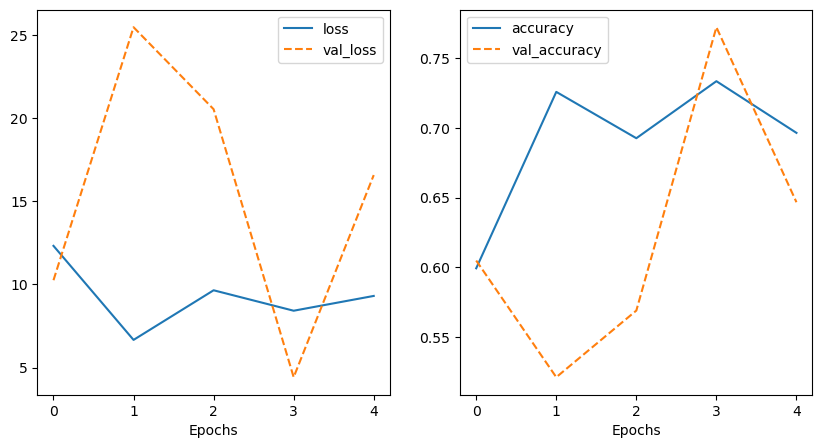

In [53]:
import matplotlib
matplotlib.rcParams.update({'font.size': 10})
def training_plot(metrics, history):
    f, ax = plt.subplots(1, len(metrics), figsize=(10,5))
    for idx, metric in enumerate(metrics):
        ax[idx].plot(history.history[metric])
        ax[idx].set_xlabel("Epochs")
        ax[idx].plot(history.history['val_' + metric], ls='dashed');
        ax[idx].legend([metric, 'val_' + metric], fontsize=10)

training_plot(['loss', 'accuracy'], history);

#### Creating model with output layer and flatten layer

In [55]:
M= keras.Sequential([keras.layers.Flatten(input_shape=(IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS)),
                         keras.layers.Dense(len(CLASS_NAMES), activation='softmax')])
M.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy']) 
history = M.fit(train_dataset, validation_data=eval_dataset, epochs=5,callbacks=[keras.callbacks.EarlyStopping(patience=1)])

Epoch 1/5
79/79 [==============================] - 3s 33ms/step - loss: 11.8938 - accuracy: 0.5992 - val_loss: 21.3489 - val_accuracy: 0.6287
Epoch 2/5
79/79 [==============================] - 2s 25ms/step - loss: 8.2952 - accuracy: 0.6978 - val_loss: 17.0099 - val_accuracy: 0.5449
Epoch 3/5
79/79 [==============================] - 2s 26ms/step - loss: 12.2855 - accuracy: 0.6581 - val_loss: 36.5305 - val_accuracy: 0.4970


In [56]:
# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(test_dataset)
print("Test Accuracy:", test_accuracy)

17/17 [==============================] - 0s 10ms/step - loss: 16.9516 - accuracy: 0.6036
Test Accuracy: 0.6035503149032593


### 2.2 A more complex classifier (2 marks)

Try a more complex architecture that has 1 or more hidden layers with dropout. For this more complex architecture, use `keras-tuner` and run it with a reasonable choice of possible parameters. You may try among the following:

- Number of hidden layers
- Sizes of hidden layers
- Dropout rate
- Learning rate

In [ ]:
# Write your code here

Write text below where you explain and justify your decision choices made in this task.

*(write your answer here)*

### 2.3 Error analysis (1 mark)

Evaluate your best-performing system from task 2 against the system of task 1 and answer the following questions.

1. Which system had a better accuracy on the test data?
2. Which system had a lower degree of overfitting?

In [ ]:
# Write your code here

*(answer the questions here)*

## Task 3 - A more complex classifier (5 marks)

### Task 3.1 Using ConvNets (2 marks)

Implement a model that uses a sequence of at least two `ConvD`, each one followed with `MaxPooling2D`. Use reasonable numbers for the hyperparameters (number of filters, kernel size, pool size, activation, etc), base on what we have seen in the lectures. Feel free to research the internet and / or generative AI to help you find a reasonable choice of hyperparameters. For this task, do not use pre-trained models.

In [ ]:
# Write your code here

### Task 3.2 Using pre-trained models (2 marks)

Use MobileNet, pre-trained on imagenet as discussed in the lectures. Add the correct classification layer, and train it with your data. Make sure that you freeze MobileNet's weights during training. Also, make sure you use a reasonable schedule for the learning rate.

In [ ]:
# Write your code here

### Task 3.3 Comparative evaluation (1 mark)

Compare the evaluation results of the best systems from tasks 3.1 and 3.2 and answer the following questions.

1. What system (including the systems you developed in Task 2) perform best on the test set?
2. Report the accuracy of your best system on each of the different weather categories. What type of weather was most difficult to detect?

In [ ]:
# Write your code here

*(write your answers here)*

## Coding (1 mark)

This mark will be assigned to submissions that have clean and efficient code and good in-code documentation of all code presented in this assignment.

## GitHub Classroom (1 mark)

These marks will be given to submissions that:

- Have continuously committed changes to the GitHub repository at GitHub Classroom.
- The commit messages are useful and informative.

# Submission

Your submission should consist of this Jupyter notebook with all your code and explanations inserted into the notebook as text cells. **The notebook should contain the output of the runs. All code should run. Code with syntax errors or code without output will not be assessed.**

**Do not submit multiple files. If you feel you need to submit multiple files, please contact Diego.Molla-Aliod@mq.edu.au first.**

Examine the text cells of this notebook so that you can have an idea of how to format text for good visual impact. You can also read this useful [guide to the MarkDown notation](https://daringfireball.net/projects/markdown/syntax), which explains the format of the text cells.

Each task specifies a number of marks. The final mark of the assignment is the sum of all the marks of each individual task.

By submitting this assignment you are acknowledging that this is your own work. Any submissions that break the code of academic honesty will be penalised as per [the academic integrity policy](https://policies.mq.edu.au/document/view.php?id=3).

## A note on the use of AI code generators

In this assignment, we view AI code generators such as copilot, CodeGPT, etc as tools that can help you write code quickly. You are allowed to use these tools, but with some conditions. To understand what you can and what you cannot do, please visit these information pages provided by Macquarie University.

- Artificial Intelligence Tools and Academic Integrity in FSE - https://bit.ly/3uxgQP4

If you choose to use these tools, make the following explicit in your Jupyter notebook, under a section with heading "Use of AI generators in this assignment" :

- What part of your code is based on the output of such tools,
- What tools you used,
- What prompts you used to generate the code or text, and
- What modifications you made on the generated code or text.

This will help us assess your work fairly.
